# Análisis de los twits de \#PiñeraRenuncia

In [23]:
import nltk
import PyPDF2 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import pandas as pd
import re
import numpy as np
from PIL import Image


%matplotlib inline

In [24]:
rdata = pd.read_csv('tweets_sobre_pinera.csv')

In [25]:
rdata.shape

(10664, 8)

In [26]:
rdata.sample(3)

,Unnamed: 0,id_str,created_at,user.screen_name,user.location,retweeted_status.created_at,text,extended_tweet.full_text
3570,7788,1186710976764305409,Tue Oct 22 18:28:39 +0000 2019,picxelse,Unknown,Mon Oct 21 22:42:03 +0000 2019,RT @sofisegoviad: Uno de los tantos cambios qu...,NaN
6042,9930,1186721565142073344,Tue Oct 22 19:10:44 +0000 2019,kro_flakis,"Punta Arenas, Chile",Tue Oct 22 14:44:28 +0000 2019,RT @TottiAlba: Alcalde de Curicó exige e estos...,NaN
9557,7291,1186691445245333504,Tue Oct 22 17:11:02 +0000 2019,thebiasedbeach,Chile,Tue Oct 22 16:00:41 +0000 2019,RT @5150sanren: Cuidado con los vándalos señor...,NaN


In [27]:
rdata['text']

0        Apoyando la guerra Falsa de piñera, y tratando...
1        RT @gapecito: Dejen de justificar a la vieja b...
2        RT @tayswiftclub: piñera: *saca a los militare...
3        RT @Fran_RedBird: #QueSeVayanLosMilicos\n#Chil...
4        RT @TottiAlba: Alcalde de Curicó exige e estos...
                               ...                        
10659    Aquí con los violentistas #PineraDictador #pin...
10660    RT @guatonbayron: LA PRENSA CHILENA ES CÓMPLIC...
10661    RT @MiguelMasbernat: TRAIGO PAAAAZ...TRAIGO AM...
10662    RT @TottiAlba: Alcalde de Curicó exige e estos...
10663    RT @ZurditaFilosofa: Quieren sacar a #piñeradi...
Name: text, Length: 10664, dtype: object

### Preprocesamiento

In [28]:
rdata["texto"] = rdata["text"].str.lower()
rdata["texto"]

0        apoyando la guerra falsa de piñera, y tratando...
1        rt @gapecito: dejen de justificar a la vieja b...
2        rt @tayswiftclub: piñera: *saca a los militare...
3        rt @fran_redbird: #quesevayanlosmilicos\n#chil...
4        rt @tottialba: alcalde de curicó exige e estos...
                               ...                        
10659    aquí con los violentistas #pineradictador #pin...
10660    rt @guatonbayron: la prensa chilena es cómplic...
10661    rt @miguelmasbernat: traigo paaaaz...traigo am...
10662    rt @tottialba: alcalde de curicó exige e estos...
10663    rt @zurditafilosofa: quieren sacar a #piñeradi...
Name: texto, Length: 10664, dtype: object

In [29]:
rdata["texto"] = rdata["texto"].str.replace('[á]','a')
rdata["texto"] = rdata["texto"].str.replace('[é]','e')
rdata["texto"] = rdata["texto"].str.replace('[í]','i')
rdata["texto"] = rdata["texto"].str.replace('[ó]','o')
rdata["texto"] = rdata["texto"].str.replace('[ú]','u')
rdata["texto"]

0        apoyando la guerra falsa de piñera, y tratando...
1        rt @gapecito: dejen de justificar a la vieja b...
2        rt @tayswiftclub: piñera: *saca a los militare...
3        rt @fran_redbird: #quesevayanlosmilicos\n#chil...
4        rt @tottialba: alcalde de curico exige e estos...
                               ...                        
10659    aqui con los violentistas #pineradictador #pin...
10660    rt @guatonbayron: la prensa chilena es complic...
10661    rt @miguelmasbernat: traigo paaaaz...traigo am...
10662    rt @tottialba: alcalde de curico exige e estos...
10663    rt @zurditafilosofa: quieren sacar a #piñeradi...
Name: texto, Length: 10664, dtype: object

In [30]:
rdata["texto"] = rdata["texto"].str.replace('[^a-zA-Záéíóúñ@#]',' ')
rdata["texto"]

0        apoyando la guerra falsa de piñera  y tratando...
1        rt @gapecito  dejen de justificar a la vieja b...
2        rt @tayswiftclub  piñera   saca a los militare...
3        rt @fran redbird  #quesevayanlosmilicos #chile...
4        rt @tottialba  alcalde de curico exige e estos...
                               ...                        
10659    aqui con los violentistas #pineradictador #pin...
10660    rt @guatonbayron  la prensa chilena es complic...
10661    rt @miguelmasbernat  traigo paaaaz   traigo am...
10662    rt @tottialba  alcalde de curico exige e estos...
10663    rt @zurditafilosofa  quieren sacar a #piñeradi...
Name: texto, Length: 10664, dtype: object

In [31]:
rdata["texto"] = rdata["texto"].str.replace(r'rt(\s)','')

In [32]:
rdata["texto"]

0        apoyando la guerra falsa de piñera  y tratando...
1        @gapecito  dejen de justificar a la vieja borr...
2        @tayswiftclub  piñera   saca a los militares a...
3        @fran redbird  #quesevayanlosmilicos #chilecam...
4        @tottialba  alcalde de curico exige e estos mo...
                               ...                        
10659    aqui con los violentistas #pineradictador #pin...
10660    @guatonbayron  la prensa chilena es complice d...
10661    @miguelmasbernat  traigo paaaaz   traigo amooo...
10662    @tottialba  alcalde de curico exige e estos mo...
10663    @zurditafilosofa  quieren sacar a #piñeradicta...
Name: texto, Length: 10664, dtype: object

In [33]:
rdata["texto"] = rdata["texto"].str.replace(r'@\w+','')

In [34]:
rdata["texto"]

0        apoyando la guerra falsa de piñera  y tratando...
1          dejen de justificar a la vieja borracha #cec...
2          piñera   saca a los militares a las calles p...
3         redbird  #quesevayanlosmilicos #chilecambio #...
4          alcalde de curico exige e estos momentos en ...
                               ...                        
10659    aqui con los violentistas #pineradictador #pin...
10660      la prensa chilena es complice de un gobierno...
10661      traigo paaaaz   traigo amoooor #piñerarenunc...
10662      alcalde de curico exige e estos momentos en ...
10663      quieren sacar a #piñeradictador del poder   ...
Name: texto, Length: 10664, dtype: object

Borré estas stopwords porque en esta selección de twits había una referencia particular al jose miguel y el alcalde de curicó

In [35]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.extend([
    'http',
    'co',
    'curico',
    'https',
    'alcalde',
    'jose',
    'jose miguel',
    'miguel',
    'performance'
])

In [36]:
def stopwordsRemover(text):
    #sentence = list(nltk.word_tokenize(text))
    sentence = text.split(" ")
    sentence = [word for word in sentence if (word not in stopwords) and (len(word)>1)]
    return sentence

In [37]:
rdata["clean"] = rdata["texto"].apply(stopwordsRemover)

In [38]:
rdata["clean"]

0        [apoyando, guerra, falsa, piñera, tratando, qu...
1        [dejen, justificar, vieja, borracha, #ceciliam...
2        [piñera, saca, militares, calles, asustar, chi...
3        [redbird, #quesevayanlosmilicos, #chilecambio,...
4        [exige, momentos, renuncia, ministro, interior...
                               ...                        
10659    [aqui, violentistas, #pineradictador, #pinerar...
10660    [prensa, chilena, complice, gobierno, asesino,...
10661    [traigo, paaaaz, traigo, amoooor, #piñerarenun...
10662    [exige, momentos, renuncia, ministro, interior...
10663    [quieren, sacar, #piñeradictador, poder, enton...
Name: clean, Length: 10664, dtype: object

In [39]:
wordCloudCorpus = " ".join([" ".join(lista) for lista in rdata["clean"]])

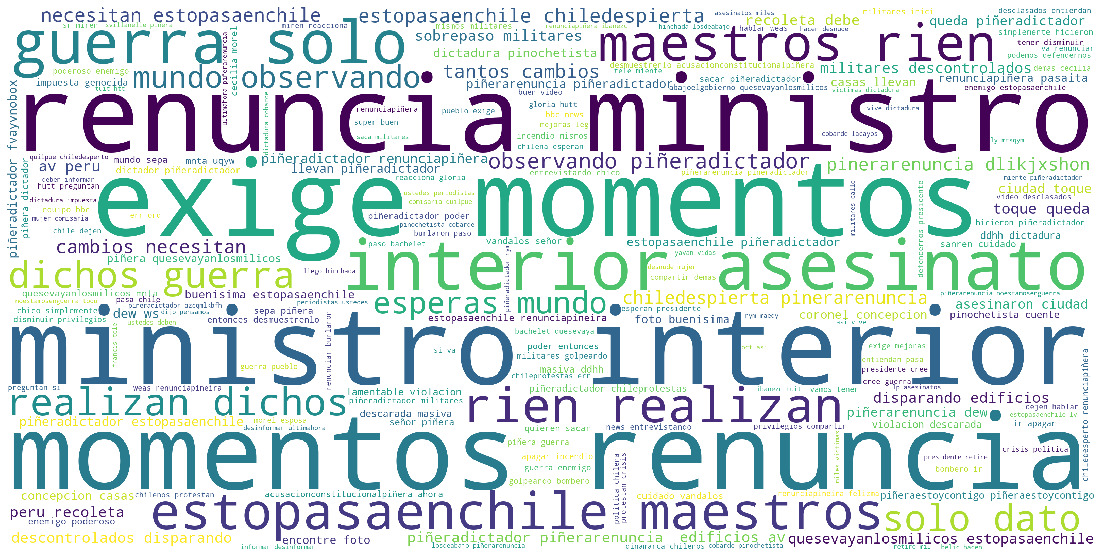

In [40]:
wordcloud = WordCloud(width=3200, height=1600,background_color="white").generate(wordCloudCorpus)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.savefig('renunciaPinera.png') 
plt.axis("off")
plt.show()

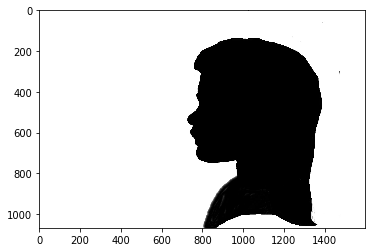

In [41]:
maskHead = np.array(Image.open("head.jpg"))
plt.imshow(maskHead)

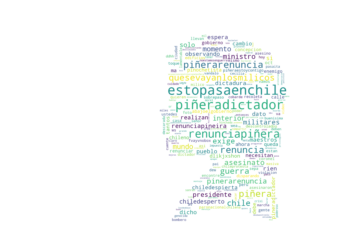

In [42]:
from wordcloud import WordCloud

wordcloud = WordCloud(collocations=False,background_color="white",mask=maskHead)

wordcloud.generate(wordCloudCorpus)

wordcloud.to_file("wordcloudHeadPython.png")

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()